## Maximum Likelihood Estimation

This notebook assumes the data is a standard continuous normal distribution. The number of random samples, mean, and standard deviation of the distribution can be set in lines 7-9 in code cell 1.

The function `gaussian` calculates the negative log likelihood given the random samples and the initial predicted mean and standard deviations defined in initParams.

The key to the whole program is the scipy function `minimize`. It is a regular optimization function and more information about it can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

**Note:** the method can be a lot of different options, all different mathematical optimization techniques.


#### Questions:
1. If everything is working, we would expect more accurate $\mu^*$ and $\sigma^*$ predictions with more random samples. Think about why this is.
2. What happens when the initial parameter guesses are extremely off? What about when they're extremely close? How does this impact the number of samples?
3. Break down each line in the `gaussian` function. Knowing what you know about MLE, what do you think the function `stats.norm.logpdf` does?

In [9]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize
np.random.seed(1)


samples = 100
mu      = 0
sigma   = 3


#  Take random sample from the distribution of data (normal dist in this case)
sample_data = np.random.normal(loc=mu, scale=sigma, size=samples)

def gaussian(params):
    mean = params[0]
    sd = params[1]

    # Calculate negative log likelihood
    nll = -np.sum(stats.norm.logpdf(sample_data, loc=mean, scale=sd))

    return nll


initParams = [1, 1]

results = minimize(gaussian, initParams, method='Nelder-Mead')


print('mean*  = {:.3f} std*  = {:.3f}'.format(results.x[0],results.x[1]))
print('mean   = {:.3f} std   = {:.3f}'.format(mu, sigma))

mean*  = 0.182 std*  = 2.655
mean   = 0.000 std   = 3.000


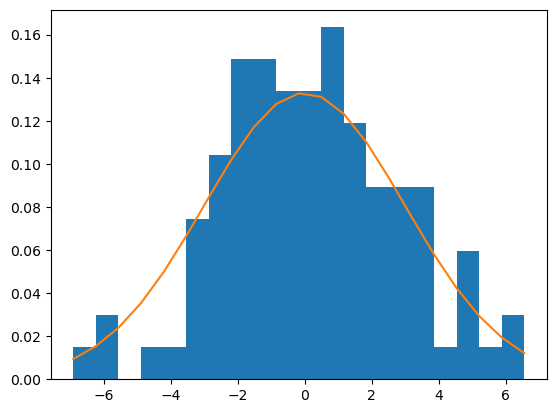

In [10]:
import matplotlib.pyplot as plt

def normal_dist(inp, mean, std):
    return 1./(np.sqrt(2.*np.pi)*std)*np.exp(-np.power((inp - mean)/std, 2.)/2)

x = np.arange(-10, 10, 0.1)
y = normal_dist(x, mu, sigma)

num_bins = 20

count, bins, ignored = plt.hist(sample_data, bins=num_bins, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))
plt.show()

In [11]:
samples = 100
log_mu = 4.0
log_s = 2.5

# Generate random data from the Logistic distribution
sample_data = np.random.logistic(loc=log_mu, scale=log_s, size=samples)

# Define the negative log likelihood function for the Logistic distribution
def logistic_nll(params):
    # Predicted parameters: params[0] is μ, params[1] is s
    mu_est = params[0]
    s_est = params[1]
    # Compute the negative log likelihood using the logistic logpdf
    nll = -np.sum(stats.logistic.logpdf(sample_data, loc=mu_est, scale=s_est))
    return nll

# Set initial guesses for μ and s
initParams = [1, 1]

# Minimize the negative log likelihood to obtain parameter estimates
results = minimize(logistic_nll, initParams, method='Nelder-Mead')

print('Estimated μ = {:.3f} and estimated s = {:.3f}'.format(results.x[0], results.x[1]))
print('True μ      = {:.3f} and true s      = {:.3f}'.format(log_mu, log_s))

Estimated μ = 4.064 and estimated s = 2.697
True μ      = 4.000 and true s      = 2.500


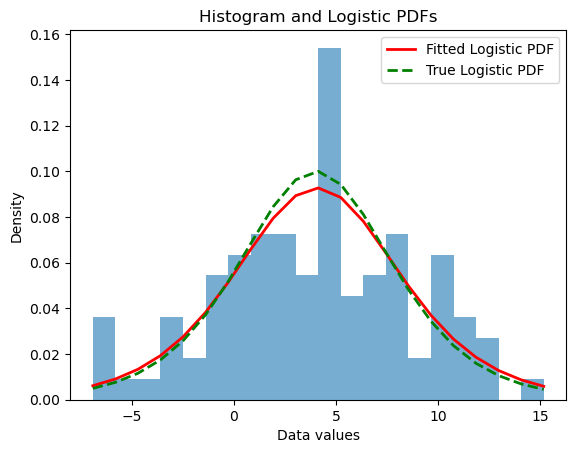

In [15]:
num_bins = 20

# Plot a histogram of the generated logistic data
count, bins, ignored = plt.hist(sample_data, bins=num_bins, density=True, alpha=0.6)

# Overlay the fitted Logistic PDF using the estimated parameters from MLE
plt.plot(bins, stats.logistic.pdf(bins, loc=results.x[0], scale=results.x[1]), 'r-', lw=2, label='Fitted Logistic PDF')

# Optionally, overlay the true Logistic PDF (if you want to compare)
plt.plot(bins, stats.logistic.pdf(bins, loc=log_mu, scale=log_s), 'g--', lw=2, label='True Logistic PDF')

plt.xlabel('Data values')
plt.ylabel('Density')
plt.title('Histogram and Logistic PDFs')
plt.legend()
plt.show()